# Introductory Examples

## Example: Plotting a White Noise Process

In [1]:
using LinearAlgebra, Statistics, Plots

In [2]:
# Base Julia function returning a single draw from normal 
# distribution with mean 0 and variance 1 
randn()

-0.25077919894438827

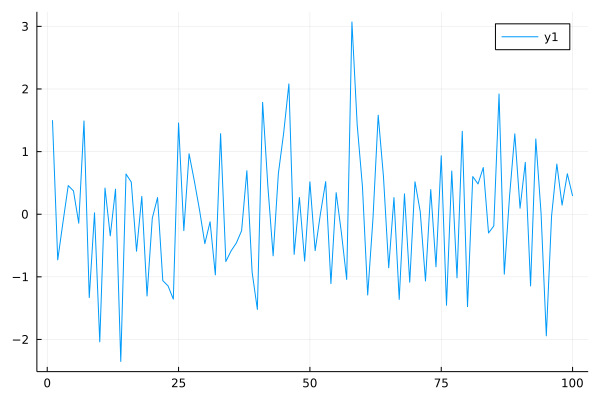

In [4]:
using Plots 

n = 100
ϵ = randn(n) # returns a column vector with n draws from normal with mean 0, var 1 
plot(1:n, ϵ)

In [6]:
# Check data type 
typeof(ϵ)

Vector{Float64} (alias for Array{Float64, 1})

In [8]:
ϵ[1:5] # Note that array indices start at 1, not 0 

5-element Vector{Float64}:
  1.5017894670782712
 -0.7292353088584245
 -0.1267286095416641
  0.4577901506139019
  0.37190068240308866

In [12]:
# As practice we can rewrite this simple program using for loops

# Poor style
n = 100 
ϵ = zeros(n)
for i in 1:n 
    ϵ[i] = randn()
end
plot(1:n,ϵ)

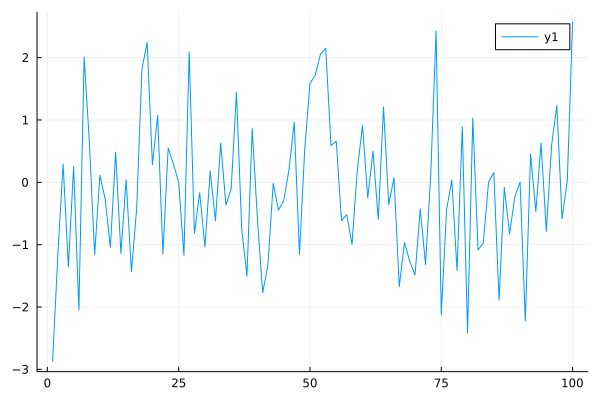

In [13]:
# Better style 
n = 100 
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end
plot(1:n, ϵ)

In [18]:
# In Julia, you can also loop directly over arrays themselves
ϵ_sum = 0.0 # need to use 0.0 here to get the right type 
m = 5 
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val 
end 
ϵ_mean = mean(ϵ[1:m])
ϵ_mean ≈ ϵ_sum / m


true

### User-defined functions

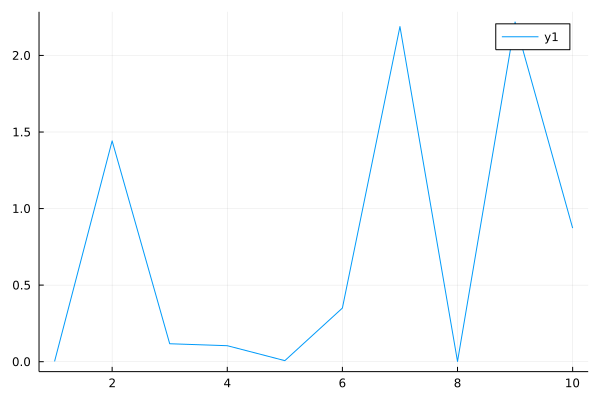

In [19]:
# Poor style 
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2 # square the result 
    end 
    return ϵ
end

data = generatedata(10)
plot(data)

In [20]:
# still poor style 
function generatedata(n)
    ϵ = randn(n) # use built in function, instead of manually looping
    
    for i in eachindex(ϵ)
        ϵ[i] = ϵ[i]^2 # squaring the result 
    end 
    
    return ϵ 
end
data = generatedata(5)

5-element Vector{Float64}:
 1.0244071623516084
 1.4228815580665455
 2.2352247630808426
 0.1313286152629061
 0.04078262859379565

In [22]:
# NOTE. Replacing the for loop with a vectorized approach is for clarity. 
# With Julia, it's not more efficient!

# better style 
function generatedata(n)
    ϵ = rand(n) 
    return ϵ.^2
end
data = generatedata(5)

5-element Vector{Float64}:
 0.1627593502204216
 0.004727634829921484
 0.7806800384397985
 0.0047236879866812504
 0.40121200064596807

In [24]:
# good style 
generatedata(n) = randn(n).^2
data = generatedata(5)

5-element Vector{Float64}:
 0.016419543766462267
 1.453157854481485
 0.035300162709235465
 0.15231647005449436
 0.1756368035597699

In [28]:
# Another "good style" approach
f(x) = x^2 
generatedata(n) = f.(randn(n))
data = generatedata(5)

5-element Vector{Float64}:
 1.5865920367017416
 1.8429566815353111
 0.47019576644137945
 1.9042883389494083
 0.0010451885998990433

In [30]:
# A final, more abstract approach. 
generatedata(n, gen) = gen.(randn(n)) # uses broadcast 

f(x) = x^2
data = generatedata(5, f) # applies f

5-element Vector{Float64}:
 6.750255588840434
 0.013211577420710595
 3.7953873752524325
 0.1219523705449346
 0.054598851942571296

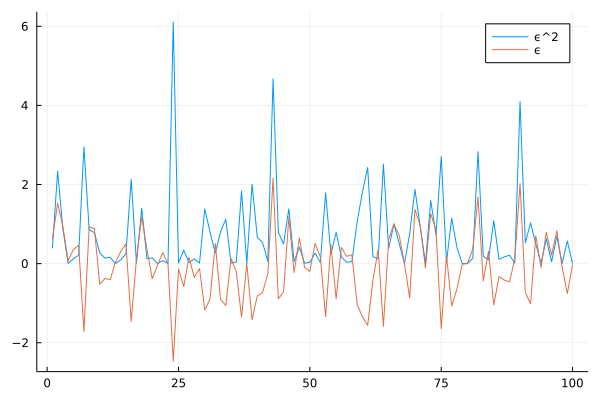

In [33]:
# direct solution with broadcasting and small user-defined function
n = 100 
f(x) = x^2 

ϵ = randn(n)
plot(f.(ϵ), label= "ϵ^2")
plot!(ϵ, label= "ϵ") # layer on the same plot

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1423


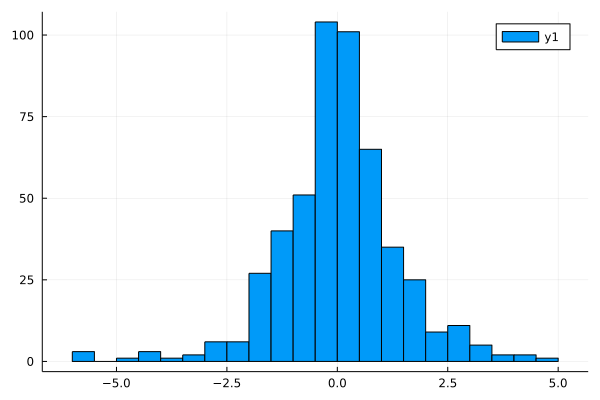

In [34]:
# A slightly more useful function 
using Distributions 

function plothistogram(distribution, n) 
    ϵ = rand(distribution, n) # n draws from distribution 
    histogram(ϵ)
end 

lp = Laplace()
plothistogram(lp, 500)

## Example: Variations on Fixed Points